Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [20]:
wine = pd.read_csv('wine.csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
#considering only numeric data
pca_data=wine.iloc[:,1:]
pca_data.head()
#Converting into numpy array
Pca = pca_data.values
Pca


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
#Normalizing the numerical data
pca_norm = scale(Pca)
pca_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [50]:
#performing pca on the data
pca = PCA(n_components=3)
pca_values = pca.fit_transform(pca_norm)
pca_values.shape

(178, 3)

In [51]:
#the amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631])

In [52]:
#Cummulative variance
var1 = np.cumsum(np.round(var,decimals= 4)*100)
var1

array([36.2 , 55.41, 66.53])

In [53]:
pca.components_


array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

In [54]:
pca.components_.shape

(3, 13)

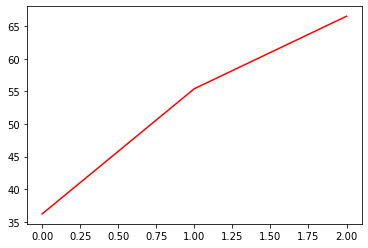

In [55]:
#variance plot for PCA components obtained
plt.plot(var1,color='red')

In [42]:
pca_values[:,0:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

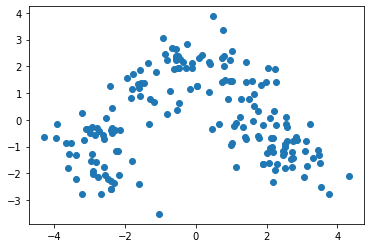

In [59]:
#plot between PCA1 and PCA2 
x= pca_values[:,0:1]
y= pca_values[:,1:2]
#z= pca_values[:,2:3]
plt.scatter(x,y)

In [66]:
finalDf= pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']),wine[['Type']]],axis=1)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

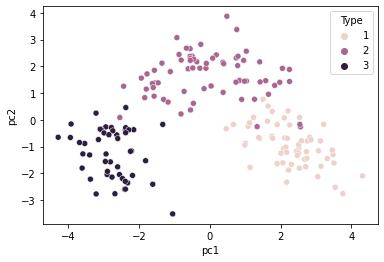

In [70]:
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type')

In [71]:
finalDf.head()

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


In [104]:
finalDf_new = finalDf.iloc[:,0:3]
finalDf_new.head()

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


# hierarchical clustering

In [105]:
#hierarchical clustering
h_cluster = AgglomerativeClustering(3,affinity='cosine',linkage='complete')
y_hc = h_cluster.fit_predict(finalDf_new)

In [106]:
#converting it into dataframe
y_cluster = pd.DataFrame(y_hc,columns=['hcluster'])


In [107]:
finalDf_new['hcluster']=h_cluster.labels_
finalDf_new

,pc1,pc2,pc3,hcluster
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,2
174,-2.601956,-1.757229,0.207581,2
175,-2.677839,-2.760899,-0.940942,2
176,-2.387017,-2.297347,-0.550696,2


# Kmeans clustering

In [109]:
wcs = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,random_state=None)
    kmeans.fit(finalDf)
    wcs.append(kmeans.inertia_)
wcs

[1645.8237049074069,
 927.3413280534473,
 518.4534750902321,
 434.6222026858683,
 379.1345180828513,
 336.0190633010454,
 300.9987001340239,
 269.009657867113,
 253.77743159318115,
 224.07402245454756]

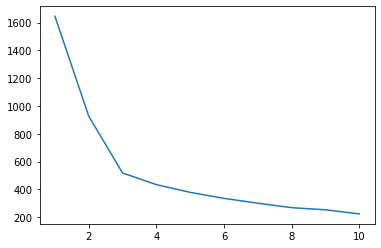

In [110]:
#elbow plot
plt.plot(range(1,11),wcs)
plt.xlabel='x'
plt.ylabel='y'
plt.show()

In [111]:
k_cluster = KMeans(3,random_state=42)
k_cluster.fit(finalDf)
#to get labels
k_cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [120]:
finalDf_new['kmeans']=k_cluster.labels_
finalDf_new

,pc1,pc2,pc3,hcluster,kmeans
0,3.316751,-1.443463,-0.165739,0,2
1,2.209465,0.333393,-2.026457,0,2
2,2.516740,-1.031151,0.982819,0,2
3,3.757066,-2.756372,-0.176192,0,2
4,1.008908,-0.869831,2.026688,0,2
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,2,0
174,-2.601956,-1.757229,0.207581,2,0
175,-2.677839,-2.760899,-0.940942,2,0
176,-2.387017,-2.297347,-0.550696,2,0


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

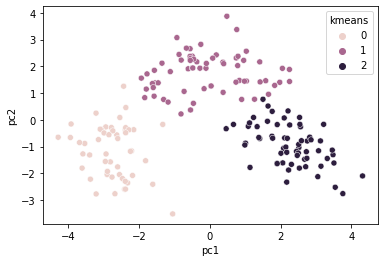

In [121]:
sns.scatterplot(data=finalDf_new,x='pc1',y='pc2',hue='kmeans')

In [122]:
finalDf_new.groupby('kmeans').agg(['mean'])

,pc1,pc2,pc3,hcluster
,mean,mean,mean,mean
kmeans,,,,
0,-2.737711,-1.164764,-0.211761,1.920000
1,-0.064219,1.757963,0.158990,0.484848
2,2.276194,-0.932054,0.001528,0.000000
